*** "From Statistical Methods for Machine Learning" by Jason Brownlee ***

## 1. Statistical Hypothesis Testing
In statistics, a hypothesis test calculates some quantity under a given assumption. The result of the test allows us to interpret whether the assumption holds or whether the assumption has been violated. Two concrete examples that we will use a lot in machine learning are:

 - A test that assumes that data has a normal distribution.
 - A test that assumes that two samples were drawn from the same underlying population distribution.
 
The assumption of a statistical test is called the null hypothesis, or hypothesis zero (**H0** for short). It is often called the default assumption, or the assumption that nothing has changed. A violation of the test’s assumption is often called the first hypothesis, hypothesis one or **H1** for short. H1 is really a short hand for some other hypothesis, as all we know is that the evidence suggests that the H0 can be rejected.

- Hypothesis 0 (H0): Assumption of the test fails to be rejected.
- Hypothesis 1 (H1): Assumption of the test does not hold and is rejected at some level of significance.

In [ ]:
s_1, s_2, s_3, ... Central Limit Theorem--> regardless of the underlying distribution, the distribution of sample means follow a normal distribution..

H0--> Null Hypothesis, for example, everyone is innocent until proven otherwise
H1--> alternative hypothesis, a person is guilty

If the prosecutor shows the evidence that the the person is guilty, then, we will reject H0
If the prosecutor cannot provide a credible evidence, then we will fail to reject the null hypothesis.

The purpose of the hypothesis test is to decide between two explanations:
 1. The difference between the sample and the population can be explained by sampling error (there does not appear to be a treatment effect)
 2. The difference between the sample and the population is too large to be  explained by sampling error (there does appear to be a treatment effect).

<img src="Figures/Hypothesis_testing1.JPG" alt="Drawing" style="width: 400px;"/>

***Step 1***: State the hypotheses and select an $\alpha$ level. The null hypothesis, H0, always states that the treatment has no effect (no change, no difference). According to the null hypothesis, the population mean after treatment is the same is it was before treatment. The $\alpha$ level establishes a criterion, or "cut-off", for making a decision about the null hypothesis. 

<img src="Figures/Hypothesis_testing2.JPG" alt="Drawing" style="width: 400px;"/>

***Step 2***: Locate the critical region. The critical region consists of outcomes that are very unlikely to occur if the null hypothesis is true. That is, the critical region is defined by sample means that are almost impossible to obtain if the treatment has no effect. The phrase “almost impossible” means that these samples have a  probability (p) that is less than the alpha level.

<img src="Figures/Hypothesis_testing3.JPG" alt="Drawing" style="width: 400px;"/>

***Step 3***: Compute the test statistic.  

***Step 4***: A large value for the test statistic shows that the obtained mean difference is more than would be expected if there is no treatment effect. If it is large enough to be in the critical region, we conclude that the difference is significant or that the treatment has a significant effect. In this case we reject the null hypothesis.

### 1.1 Interpret the p-value
We describe a finding as statistically significant by interpreting the p-value. For example, we may perform a Student’s t-test on two data samples and find that it is unlikely that the samples have the same mean. We reject the null hypothesis that the samples have the same mean at a chosen level of statistical significance (or confidence). A statistical hypothesis test may return a value called p or the p-value. This is a quantity that we can use to interpret or quantify the result of the test and either reject or fail to reject the null hypothesis. This is done by comparing the p-value to a threshold value chosen beforehand called the significance level.

The significance level is often referred to by the Greek lower case letter alpha ($\alpha$). A common value used for alpha is $5\%$ or $0.05$. A smaller alpha value suggests a more robust interpretation of the result, such as $1\%$ or $0.01\%$. The p-value is compared to the pre-chosen alpha value. A result is statistically significant when the p-value is less than or equal to alpha. This signifies a change was detected: that the default or null hypothesis can be rejected.

- p-value ≤ alpha: significant result, reject null hypothesis (H1).
- p-value > alpha: not significant result, fail to reject the null hypothesis (H0).

The significance level can be inverted by subtracting it from 1 to give a confidence level of the hypothesis given the observed sample data.

confidence level = 1 − significance level

### 1.2 Errors in Statistical Tests
The interpretation of a statistical hypothesis test is probabilistic. That means that the evidence of the test may suggest an outcome and be mistaken. For example, if alpha was $5\%$, it suggests that (at most) 1 time in 20 that the null hypothesis would be mistakenly rejected because of the statistical noise in the data sample. Given a small p-value (reject the null hypothesis) either means that the null hypothesis false (we got it right) or it is true and some rare and unlikely event has been observed (we made a mistake). If this type of error is made, it is called a false positive. We falsely believe the rejection of the null hypothesis.

Alternately, given a large p-value (fail to reject the null hypothesis), it may mean that the null hypothesis is true (we got it right) or that the null hypothesis is false and some unlikely event occurred (we made a mistake). If this type of error is made, it is called a false negative. We falsely believe the null hypothesis or assumption of the statistical test.
Each of these two types of error has a specific name.

- Type I Error: The incorrect rejection of a true null hypothesis, called a false positive.
- Type II Error: The incorrect failure of rejecting a false null hypothesis, called a false negative.

<img src="Figures/Hypothesis_testing4.JPG" alt="Drawing" style="width: 400px;"/>


## 2. Statistical Distributions
Many data conform to well-known and well-understood mathematical functions, such as the Gaussian distribution. A function can fit the data with a modification of the parameters of the function, such as the mean and standard deviation in the case of the Gaussian. Once a distribution function is known, it can be used as a shorthand for describing and calculating related quantities, such as likelihoods of observations, and plotting the relationship between observations in the domain.

### 2.1 Gaussian Distribution
We can work with the Gaussian distribution via the `norm` SciPy module. The `norm.pdf()` function can be used to create a Gaussian probability density function with a given sample space, mean, and standard deviation.

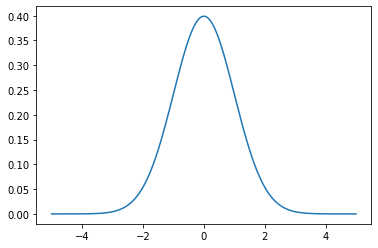

In [35]:
# plot the gaussian pdf
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# define the distribution parameters
sample_space = arange(-5, 5, 0.001)
mean = 0.0
stdev = 1.0
# calculate the pdf
pdf = norm.pdf(sample_space, mean, stdev)
# plot
pyplot.plot(sample_space, pdf)
pyplot.show()

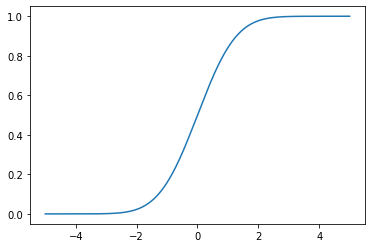

In [36]:
# plot the gaussian cdf
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# define the distribution parameters
sample_space = arange(-5, 5, 0.001)
# calculate the cdf
cdf = norm.cdf(sample_space)
# plot
pyplot.plot(sample_space, cdf)
pyplot.show()

In [ ]:
P(X<=4)=F(X=4)
P(X>4)=1-P(X<=4)=1-F(4)

### 2.2 Student’s t-Distribution
The Student’s t-distribution, or just t-distribution for short, is named for the pseudonym Student by William Sealy Gosset. It is a distribution that arises when attempting to estimate the mean of a normal distribution with different sized samples. As such, it is a helpful shortcut when describing uncertainty or error related to estimating population statistics for data drawn from Gaussian distributions when the size of the sample must be taken into account.

Although you may not use the Student’s t-distribution directly, you may estimate values from the distribution required as parameters in other statistical methods, such as statistical significance tests. The distribution can be described using a single parameter:

- number of degrees of freedom: denoted with the lowercase Greek letter nu ($\nu$), denotes the number degrees of freedom.

The number of degrees of freedom describes the number of pieces of information used to describe a population quantity. For example, the mean has n degrees of freedom as all n observations in the sample are used to calculate the estimate of the population mean. A statistical quantity that makes use of another statistical quantity in its calculation must subtract 1 from the degrees of freedom, such as the use of the mean in the calculation of the sample variance.

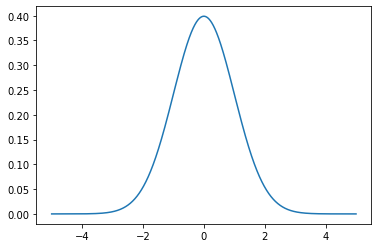

In [37]:
# plot the t-distribution pdf
from numpy import arange
from matplotlib import pyplot
from scipy.stats import t
# define the distribution parameters
sample_space = arange(-5, 5, 0.001)
dof = len(sample_space) - 1
# calculate the pdf
pdf = t.pdf(sample_space, dof)
# plot
pyplot.plot(sample_space, pdf)
pyplot.show()

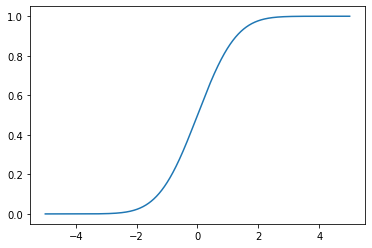

In [38]:
# plot the t-distribution cdf
from numpy import arange
from matplotlib import pyplot
from scipy.stats import t
# define the distribution parameters
sample_space = arange(-5, 5, 0.001)
dof = len(sample_space) - 1
# calculate the cdf
cdf = t.cdf(sample_space, dof)
# plot
pyplot.plot(sample_space, cdf)
pyplot.show()

### 2.3 Chi-Squared Distribution
The Chi-Squared distribution is denoted as the lowercase Greek letter chi ($\chi$) pronounced "ki" as in “kite”, raised to the second power (χ2). It is easier to write Chi-Squared. Like the Student’s t-distribution, the Chi-Squared distribution is also used in statistical methods on data drawn from a Gaussian distribution to quantify the uncertainty. For example, the Chi-Squared distribution is used in the Chi-Squared statistical tests for independence. In fact, the Chi-Squared distribution is used in the derivation of the Student’s t-distribution. The Chi-Squared distribution has one parameter:
- degrees of freedom, denoted k.
- $chi=\sum_{i=1}^kx_i^2$

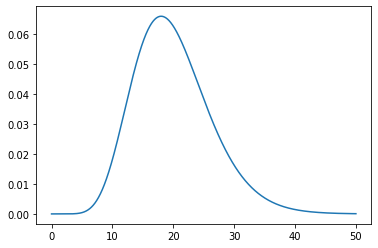

In [39]:
# plot the chi-squared pdf
from numpy import arange
from matplotlib import pyplot
from scipy.stats import chi2
# define the distribution parameters
sample_space = arange(0, 50, 0.01)
dof = 20
# calculate the pdf
pdf = chi2.pdf(sample_space, dof)
# plot
pyplot.plot(sample_space, pdf)
pyplot.show()

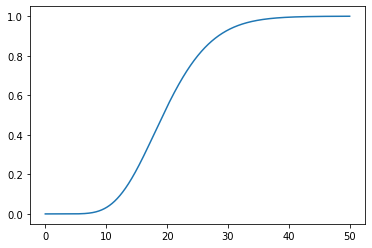

In [40]:
# plot the chi-squared cdf
from numpy import arange
from matplotlib import pyplot
from scipy.stats import chi2
# define the distribution parameters
sample_space = arange(0, 50, 0.01)
dof = 20
# calculate the cdf
cdf = chi2.cdf(sample_space, dof)
# plot
pyplot.plot(sample_space, cdf)
pyplot.show()

## 3. Critical Values
Many statistical hypothesis tests return a p-value that is used to interpret the outcome of the test. Some tests do not return a p-value, requiring an alternative method for interpreting the calculated test statistic directly. A statistic calculated by a statistical hypothesis test can be interpreted using critical values from the distribution of the test statistic. Some examples of statistical hypothesis tests and their distributions from which critical values can be calculated
are as follows:
- Z-Test: Gaussian distribution.
- Student’s t-Test: Student’s t-distribution.
- Chi-Squared Test: Chi-Squared distribution. 
- ANOVA: F-distribution.

A critical value is defined in the context of the population distribution and a probability. An observation from the population with a value equal to or lesser than a critical value with the given probability. We can express this mathematically as follows:

$$Pr[X\leq critical\ value]= probability$$

Where $Pr$ is the calculation of probability, $X$ are observations from the population, $critical\ value$ is the calculated critical value, and $probability$ is the chosen probability.

### 3.1 How to Calculate Critical Values

In order to calculate a critical value, we require a function that, given a probability (or significance), will return the observation value from the distribution. Specifically, we require the inverse of the cumulative density function, where given a probability, we are given the observation value that is less than or equal to the probability. This is called the percent point function (PPF), or more generally the quantile function.

- Percent Point Function (PPF): Returns the observation value for the provided proba- bility that is less than or equal to the provided probability from the distribution.


In [41]:
# gaussian percent point function
from scipy.stats import norm
# define probability
p = 0.95
# retrieve value <= probability
value = norm.ppf(p)
print(value)
# confirm with cdf
p = norm.cdf(value)
print(p)

1.6448536269514722
0.95


In [42]:
# student t-distribution percent point function
from scipy.stats import t
# define probability
p = 0.95
df = 10
# retrieve value <= probability
value = t.ppf(p, df)
print(value)
# confirm with cdf
p = t.cdf(value, df)
print(p)

1.8124611228107335
0.949999999999923


In [43]:
# chi-squared percent point function
from scipy.stats import chi2
# define probability
p = 0.95
df = 10
# retrieve value <= probability
value = chi2.ppf(p, df)
print(value)
# confirm with cdf
p = chi2.cdf(value, df)
print(p)

18.307038053275146
0.95


### 3.2 One-tailed Test
A one-tailed test has a single critical value, such as on the left or the right of the distribution. Often, a one-tailed test has a critical value on the right of the distribution for non-symmetrical distributions (such as the Chi-Squared distribution). The statistic is compared to the calculated critical value. If the calculated statistic is less than or equal to the critical value, the null hypothesis of the statistical test has failed to be rejected. We can summarize this interpretation as follows:
- Test Statistic ≤ Critical Value: not significant result, fail to reject null hypothesis (H0).
- Test Statistic > Critical Value: significant result, reject null hypothesis (H0).

### Case 1---z-test for population means
A z-test is a hypothesis test in which the z-statistic follows a normal distribution. The z-test for a population mean can be used to determine whether the population mean is the same as the hypothesized mean $\mu_0$ , assuming that the population standard deviation $\sigma$ is known. When performing a hypothesis test involving the mean of a single population with a known population standard deviation, the distribution of the z-test statistic $\left( \frac{\bar x -\mu_0}{\frac{\sigma}{\sqrt(n)}} \right)$ is assumed to be $N(0,1)$.



***Example***: A popular electronics website wants to determine whether a smartphone has an 7.8 hour battery life as claimed by the manufacturer in response to user complaints of poor battery life. The website sampled 10 smartphones with a mean battery life of 7.6 hours. The population standard deviation of the battery life is $\sigma=0.57$ hours. Does sufficient evidence exist that the battery life of the smartphone is actually lower than the manufacturer's claim at a significance level of $\alpha=0.05$?

***Solution***: The null hypothesis is that the smartphone's mean battery life is $\mu_0=7.8$ hours. Because customers believe that the mean battery life is lower, the hypothesis test is left-tailed. That is, the alternative hypothesis is that the smartphone's mean battery life is less than 7.8 hours. Mathematically,

$$\begin{array} {lcl} H_0 & : & \mu=7.8 \\
H_a& : & \mu<7.8 \end{array}$$

Since $\bar x =7.6$, $n=10$, and $\sigma=0.57$, the test statistic is

$$z=\frac{7.6-7.8}{\frac{0.57}{\sqrt 10}}\approxeq -1.110$$

The $p$-value is

$$p_{value}=P(z\leq -1.110)\approxeq 0.133$$

<img src="Figures/Hypothesis_testing5.JPeG" alt="Drawing" style="width: 400px;"/>

Since the p-value is greater than the significance level $\alpha = 0.05$, insufficient evidence exists to support the hypothesis that the mean battery life of the smartphone is less than the manufacturer's claim.

Although the mean battery life of the 10 sampled smartphones is less than the manufacturer's claim, the lower mean could have occurred due to chance. However, the probability that the sample mean battery life is at most 7.6 hours is , which is 13.3% much higher than the probability of incorrectly rejecting the manufacturer's claim that the smartphone has a mean battery life of 7.8 hours. Thus, the lower sample mean can be most likely be attributed to chance.

In [4]:
# gaussian percent point function
from scipy.stats import norm
xbar=7.6
mu=7.8
sigma=0.57
n=10
alpha=0.05
value=(xbar-mu)/(sigma/n**(1/2))
p = norm.cdf(value)
print(p)

if p<alpha:
    print("Reject the Null Hypothesis")
else:
    print("Failed to reject the Null Hypothesis")


0.1335919433425996
Failed to reject the Null Hypothesis


***Python ztest function*** The `ztest(x1, value)` function is used to perform a one-sample z-test for means. The function requires the `statsmodels.stats.weightstats` library to be imported, and takes two inputs. The first input x1 is an array and the second input value is the hypothesized value of the population mean. The function returns the z-score and the two-tailed -value.

In [8]:
from statsmodels.stats.weightstats import ztest
import pandas as pd
scores = pd.read_csv('ExamScores.csv')
print(ztest(x1 = scores['Exam1'],  value = 86))

(-2.5113146627890988, 0.012028242796839027)


In [13]:
len(scores['Exam1'])

50

In [15]:
from scipy.stats import norm
xbar=scores['Exam1'].mean()
mu=86
sigma=scores['Exam1'].std()
n= len(scores['Exam1'])
alpha=0.05
value=(xbar-mu)/(sigma/n**(1/2))
p = norm.cdf(value)
print(value)
print(p)

-2.5113146627890988
0.006014121398419513


The graph for the two-tailed z-test corresponding to the output above is shown below.

<img src="Figures/Hypothesis_testing6.JPG" alt="Drawing" style="width: 400px;"/>

The one-sided p-value is the two-sided p-value divided by 2. The graph for the corresponding left-tailed p-test is shown below.
<img src="Figures/Hypothesis_testing7.JPG" alt="Drawing" style="width: 400px;"/>

The graph for the corresponding right-tailed p-test is shown below.

<img src="Figures/Hypothesis_testing8.JPG" alt="Drawing" style="width: 400px;"/>


### Case 2---Student's t-test
If the variance $\sigma^2$ is unknown, hypotheses about the mean $\mu$ of a normal random
variable $X ∼ N(\mu, \sigma^2)$ can be tested in a similar way to the z-test. The difference is that the unknown variance is estimated from the sample.
Because the population standard deviation is rarely known, the t-test is commonly used to compare the observed sample mean to a hypothesized mean.


#### Example:  T-test One Sample
Run it when sample size is small (less than 30) and/or the popiulation standard deviation ($\sigma^2$) is unknown

 You are experiencing hair loss and skin discoloration and think it might be because of selenium toxicity. You decide to measure the selenium levels in  your tap water once a day for one week. your results are g iven below. the EPA maximum contaminant level for safe drinking water is $0.05mg/L$. Does the selenium level in your tap water exceed the legal limit (assume $\alpha=0.05$)?

| Day      | Selenium (mg/L) |
| :---        |    :----:   |  
| 1   | 0.051| 
| 2   | 0.0505| 
| 3 | 0.049| 
| 4  | 0.0516|
| 5 | 0.052| 
| 6 | 0.0508|
| 7  | 0.0506|


Let us set up our hypotheses. Remember, we only had seven samples from our tap water, based on this sample set, we are trying to hypothesize about the true slenium level in our tap water ($\mu$). there is no way we can measure our entire volume of tap water:)

- $H_o$: We will assume that the selenium level in our tap water is $0.05$. That is, $\mu= 0.05$
- $H_a$: Our alternative hypothesis, which is not the desired level, is that the selenium in our tap water exceeds the legal limit of $0.05$. That is $\mu>0.05$. 

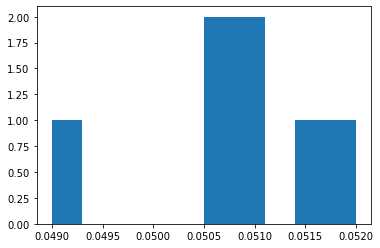

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)
sample = np.array([0.051,0.0505,0.049,0.0516,0.052,0.0508,0.0506])
plt.hist(sample)
plt.show()


In [28]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# T-Test
t,p = stats.ttest_1samp(sample, 0.05)
# ttest_1samp is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print ("t-statistic:" + str(t))
print("p-value:" + str(p1))

t-statistic:2.173499949434694
p-value:0.036355


In [19]:
sample_bar=sample.mean()
sample_bar

0.05078571428571429

In [20]:
sample_std=math.sqrt(sum((sample-sample_bar)**2)/(len(sample)-1))
sample_std

0.0009564318610135812

In [25]:
mu=0.05
tvalue=(sample_bar-mu)/(sample_std/math.sqrt(len(sample)))
print(tvalue)

2.173499949434694


In [30]:
from scipy.stats import t
# define probability

df = len(sample)-1
p2 = t.cdf(tvalue, df)
print(p2)
print((1-p2))

0.9636449406601787
0.036355059339821305


In [39]:
# student t-distribution percent point function
from scipy.stats import t
# define probability
p = 0.9636
df = 6
# retrieve value <= probability
value = t.ppf(p, df)
print(value)
# confirm with cdf
p = t.cdf(value, df)
print(p)

2.172604168221127
0.9635999999753254


Next, I am plotting the distribution for the population

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n = 7
nsim = 300000
mu = 0.05
sigma = 2
xbar=[]
sx=[]
for i in range(nsim):
    x = np.random.normal(mu, sigma, n)
    xbar.append(x.mean())
    sx.append(x.std())

    
xbar=np.array(xbar)
sx=np.array(sx)
zstat = (xbar-mu)/(sigma / math.sqrt(n))
tstat = (xbar-mu)/(sx / math.sqrt(n-1))


In [8]:
tstat.mean()

0.0024780762387482946

In [9]:
tstat.sort()

In [14]:
lxbar=len(tstat)
CF=96.36
CFp=math.floor(lxbar*(1-CF/100))
CFpvalue=tstat[-CFp]
CFnvalue=tstat[CFp]

In [15]:
CFpvalue

2.1866389615715027

In [16]:
CFnvalue

-2.158636521746931

In [13]:
CFp

5459

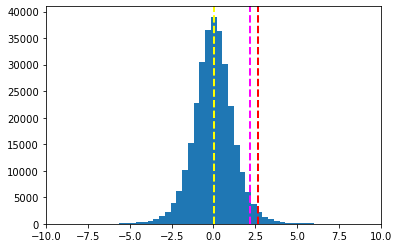

In [40]:
plt.hist(tstat, bins=100)
plt.axvline(tstat.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(tvalue, color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(CFpvalue, color='red', linestyle='dashed', linewidth=2)
axes = plt.gca()
axes.set_xlim([-10,10])
#axes.set_ylim([ymin,ymax])
plt.show()

***EXAMPLE*** Our students have completed their school year, and been asked to rate their statistics class on a scale between -5 (terrible) and 5 (fantastic). The statistics class is taught online to tens of thousands of students, so to assess its success, we'll take a random sample of 50 ratings.

Run the following code to draw 50 samples.

Min:-5
Max:5
Mean:0.84


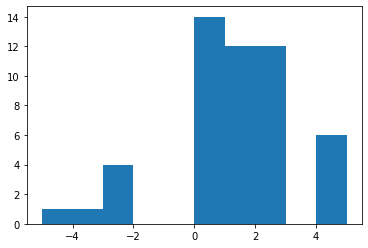

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)
lo = np.random.randint(-5, -1, 6)
mid = np.random.randint(0, 3, 38)
hi = np.random.randint(4, 6, 6)
sample = np.append(lo,np.append(mid, hi))
print("Min:" + str(sample.min()))
print("Max:" + str(sample.max()))
print("Mean:" + str(sample.mean()))

plt.hist(sample)
plt.show()

In [2]:
len(lo)

6

A question we might immediately ask is: "how do students tend to like the class"? In this case, possible ratings were between -5 and 5, with a "neutral" score of 0. In other words, if our average score is above zero, then students tend to enjoy the course. 

In the sample above, the mean score is above 0 (in other words, people liked the class in this data). If you had actually run this course and saw this data, it might lead you to believe that the overall mean rating for this class (i.e., not just the sample) is likely to be positive. 

There is an important point to be made, though: this is just a sample, and you want to make a statement not just about your sample but the whole population from which it came. In other words, you want to know how the class was received overall, but you only have access to a limited set of data. This often the case when analyzing data. 

So, how can you test your belief that your positive looking *sample* reflects the fact that the course does tend to get good evaluations, that your *population* mean (not just your sample mean) is positive?

We start by defining two hypotheses:

* The *null* hypothesis (**H<sub>0</sub>**) is that the population mean for all of the ratings is *not* higher than 0, and the fact that our sample mean is higher than this is due to random chance in our sample selection. 
* The *alternative* hypothesis (**H<sub>1</sub>**) is that the population mean is actually higher than 0, and the fact that our sample mean is higher than this means that our sample correctly detected this trend. 

You can write these as mutually exclusive expressions like this:

\begin{equation}H_{0}: \mu \le 0 \\ H_{1}: \mu > 0 \end{equation}

So how do we test these hypotheses? Because they are mutually exclusive, if we can show the null is probably not true, then we are safe to reject it and conclude that people really do like our online course. But how do we do that?

Well, if the *null* hypothesis is true, the sampling distribution for ratings with a sample size of 50 will be a normal distribution with a mean of 0. Run the following code to visualize this, with the mean of 0 shown as a yellow dashed line.

*(The code just generates a normal distribution with a mean of 0 and a standard deviation that makes it approximate a sampling distribution of 50 random means between -5 and 5 - don't worry too much about the actual values, it's just to illustrate the key points!)*

In [ ]:
I sampled ratings from 50 students--> average of 50 ratings is greater than 0--> students enjoyed the class

H0: mean<0, for me to reject this thypothesis, I need a credible evidence. I would say, the average of 50 strudents is greater than 0 by chance
H1: show me a credible evidence that the average of 50 students greater 0 is not happening by chance.    


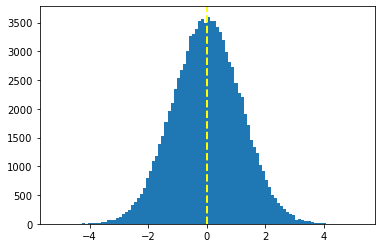

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pop = np.random.normal(0, 1.15, 100000)
plt.hist(pop, bins=100)
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
plt.show()

This illustrates all the *sample* results you could get if the null hypothesis was true (that is, the rating population mean is actually 0). Note that if the null hypothesis is true, it's still *possible* to get a sample with a mean ranging from just over -5 to just under 5. The question is how *probable* is it to get a sample with a mean as high we did for our 50-rating sample under the null hypothesis? And how improbable would it *need* to be for us to conclude that the null is, in fact, a poor explanation for our data? 

Well, we measure distance from the mean in standard deviations, so we need to find out how many standard deviations above the null-hypothesized population mean of 0 our sample mean is, and measure the area under the distribution curve from this point on - that will give us the probability of observing a mean that is *at least* as high as our sample mean. We call the number of standard deviations above the mean where our sample mean is found the ***test statistic*** (or sometimes just *t-statistic*), and we call the area under the curve from this point (representing the probability of observing a sample mean this high or greater) the ***p-value***.

So the p-value tells us how probable our sample mean is when the null is true, but we need to set a threshold under which we consider this to be too improbable to be explained by random chance alone. We call this threshold our *critical value*, and we usually indicate it using the Greek letter alpha (**&alpha;**). You can use any value you think is appropriate for **&alpha;** - commonly a value of 0.05 (5%) is used, but there's nothing special about this value.

We calculate the t-statistic by performing a statistical test. Technically, when the standard deviation of the population is known, we call it a *z-test* (because a *normal* distribution is often called a *z-distribution* and we measure variance from the mean in multiples of standard deviation known as *z-scores*). When the standard deviation of the population is not known, the test is referred to as a *t-test* and based on an adjusted version of a normal distribution called a *student's t distribution*, in which the distribution is "flattened" to allow for more sample variation depending on the sample size. Generally, with a sample size of 30 or more, a t-test is approximately equivalent to a z-test.

Specifically, in this case we're performing a *single sample* test (we're comparing the mean from a single sample of ratings against the hypothesized population mean), and it's a *one-tailed* test (we're checking to see if the sample mean is *greater than* the null-hypothesized population mean - in other words, in the *right* tail of the distribution).

The general formula for one-tailed, single-sample t-test is:

\begin{equation}t = \frac{\bar{x} - \mu}{s \div \sqrt{n}} \end{equation}

In this formula, **x&#772;** is the sample mean, **&mu;** is the population mean, **s** is the standard deviation, and **n** is the sample size. You can think of the numerator of this equation (the expression at the top of the fraction) as a *signal*, and the denominator (the expression at the bottom of the fraction) as being *noise*. The signal measures the difference between the statistic and the null-hypothesized value, and the noise represents the random variance in the data in the form of standard deviation (or standard error). The t-statistic is the ratio of signal to noise, and measures the number of standard errors between the null-hypothesized value and the observed sample mean. A large value tells you that your "result" or "signal" was much larger than you would typically expect by chance.

Fortunately, most programming languages used for statistical analysis include functions to perform a t-test, so you rarely need to manually calculate the results using the formula.

Run the code below to run a single-sample t-test comparing our sample mean for ratings to a hypothesized population mean of 0, and visualize the resulting t-statistic on the normal distribution for the null hypothesis.


In [ ]:
we have normal distributin with mu=mean and sigma=std-->N(mu, sigma)
if mu=0, and sigma=1, then this normal distributino is called Standard Normal Distribution-->N(mean=0, std=1)

Scaling--> 

1. take the data, subtract the mean of data from the data points, the mean of the new data will be zero
mean[X-mean(X)]=0
mean=(x_1+x_2+...x_n)/n

(x_1-mean + x_2-mean + x_3-mean+...x_n-mean)/n

(x_1+x_2+...x_n)/n-n*mean/n=mean-mean=0

2. Take the centered data, and divide by the std of data--> will make the std of data =1

now, this scaled data has mean 0 and std 1

In [ ]:
If I give you a X~N(mean=mu, stdsigma)

then z=(X-mu)/Sigma-->Normal(mean=0, sigma=1)-->z-transformation

t-statistic:2.773584905660377
p-value:0.003911


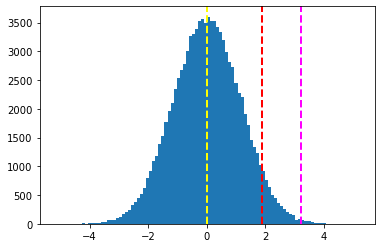

In [4]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# T-Test
t,p = stats.ttest_1samp(sample, 0)
# ttest_1samp is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print ("t-statistic:" + str(t))
print("p-value:" + str(p1))

# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, 0, 1.15)
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
s_1=mean(50 scores)--> a data point

s1_standardized=(s_1-mu)/(std of the sample)

I do not know mean and std of the population

I am using standardized distribution--> has mu=0, std=1

In [6]:
ci

(-1.8915816709941937, 1.8915816709941928)

In the plot produced by the code above, the yellow line shows the population mean for the null hypothesis. The area under the curve to the right of the red line represents the critical value of 0.05 (or 5%). The magenta line indicates how much higher the sample mean is compared to the hypothesized population mean. This is calculated as the t-statistic (which is printed above the plot) multiplied by the standard deviation. The area under the curve to the right of this encapsulates the p-value calculated by the test (which is also printed above the plot).

So what should we conclude from these results?

Well, if the p-value is smaller than our critical value of 0.05, that means that under the null hypothesis, the probability of observing a sample mean as high as we did by random chance is low. That's a good sign for us, because it means that our sample is unlikely under the null, and therefore the null is a poor explanation for the data. We can safely *reject* the null hypothesis in favor of the alternative hypothesis - there's enough evidence to suggest that the population mean for our class ratings is greater than 0.

Conversely, if the p-value is greater than the critical value, we *fail to reject the null hypothesis* and conclude that the mean rating is not greater than 0. Note that we never actually *accept* the null hypothesis, we just conclude that there isn't enough evidence to reject it!

In [ ]:
use t test if sample size is less than 30
use z test if sample size is greater than 30

### 3.2 Two-tailed Test
A two-tailed test has two critical values, one on each side of the distribution, which is often assumed to be symmetrical (e.g. Gaussian and Student-t distributions.). When using a two- tailed test, a significance level (or alpha) used in the calculation of the critical values must be divided by 2. The critical value will then use a portion of this alpha on each side of the distribution. To make this concrete, consider an alpha of 5%. This would be split to give two alpha values of 2.5% on either side of the distribution with an acceptance area in the middle of the distribution of 95%.

We can refer to each critical value as the lower and upper critical values for the left and right of the distribution respectively. Test statistic values more than or equal to the lower critical value and less than or equal to the upper critical value indicate the failure to reject the null hypothesis. Whereas test statistic values less than the lower critical value and more than the upper critical value indicate rejection of the null hypothesis for the test. We can summarize this interpretation as follows:
- Lower CR ≤ Test Statistic ≥ Upper CR: not significant result, fail to reject null hy- pothesis (H0).
- Test Statistic < Lower CR OR Test Statistic > Upper CR: significant result, re-ject null hypothesis (H0).

***EXAMPLE (Cont)***
The previous test was an example of a one-tailed test in which the p-value represents the area under one tail of the distribution curve. In this case, the area in question is under the right tail because the alternative hypothesis we were trying to show was that the true population mean is *greater than* the mean of the null hypothesis scenario.

Suppose we restated our hypotheses like this:
* The *null* hypothesis (**H<sub>0</sub>**) is that the population mean for all of the ratings is 0, and the fact that our sample mean is higher or lower than this can be explained by random chance in our sample selection.
* The *alternative* hypothesis (**H<sub>1</sub>**) is that the population mean is not equal to 0.

We can write these as mutually exclusive expressions like this:

\begin{equation}H_{0}: \mu = 0 \\ H_{1}: \mu \neq 0 \end{equation}

Why would we do this? Well, in the test we performed earlier, we could only reject the null hypothesis if we had really *positive* ratings, but what if our sample data looked really *negative*? It would be a mistake to turn around and run a one-tailed test the other way, for negative ratings. Instead, we conduct a test designed for such a question: a two-tailed test.

A two-tailed test has two critical values, one on each side of the distribution, which is often assumed to be symmetrical (e.g. Gaussian and Student-t distributions.). When using a two- tailed test, a significance level (or alpha) used in the calculation of the critical values must be divided by 2. The critical value will then use a portion of this alpha on each side of the distribution. To make this concrete, consider an alpha of 5%. This would be split to give two alpha values of 2.5% on either side of the distribution with an acceptance area in the middle of the distribution of 95%.

We can refer to each critical value as the lower and upper critical values for the left and right of the distribution respectively. Test statistic values more than or equal to the lower critical value and less than or equal to the upper critical value indicate the failure to reject the null hypothesis. Whereas test statistic values less than the lower critical value and more than the upper critical value indicate rejection of the null hypothesis for the test. We can summarize this interpretation as follows:
- Lower CR ≤ Test Statistic ≥ Upper CR: not significant result, fail to reject null hy- pothesis (H0).
- Test Statistic < Lower CR OR Test Statistic > Upper CR: significant result, re-ject null hypothesis (H0).

In a two-tailed test, we are willing to reject the null hypothesis if the result is significantly *greater* or *lower* than the null hypothesis. Our critical value (5%) is therefore split in two: the top 2.5% of the curve and the bottom 2.5% of the curve. As long as our test statistic is in that region, we are in the extreme 5% of values (p < .05) and we reject the null hypothesis. In other words, our p-value now needs to be below .025, but it can be in either tail of the distribution. For convenience, we usually "double" the p-value in a two-tailed test so that we don't have to remember this rule and still compare against .05 (this is known as a "two-tailed p-value"). In fact, it is assumed this has been done in all statistical analyses unless stated otherwise. 

The following code shows the results of a two-tailed, single sample test of our class ratings. Note that the ***ttest_1samp*** function in the ***stats*** library returns a 2-tailed p-value by default (which is why we halved it in the previous example).


t-statistic:2.773584905660377
p-value:0.007822


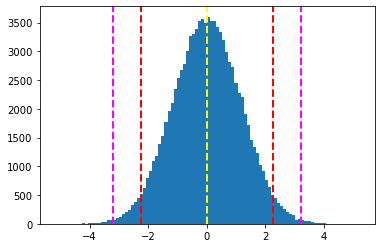

In [7]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# T-Test
t,p = stats.ttest_1samp(sample, 0)
print ("t-statistic:" + str(t))
# ttest_1samp is 2-tailed
print("p-value:" + '%f' % p)
# calculate a 95% confidence interval. 5% of the probability is outside this, 2.5% in each tail
ci = stats.norm.interval(0.95, 0, 1.15)
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the confidence interval thresholds - 5% of propbability is under the curve outside these.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic thresholds - the p-value is the area under the curve outside these
plt.axvline(pop.mean() - t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

Here we see that our 2-tailed p-value was clearly less than 0.05; so We reject the null hypothesis.

You may note that doubling the p-value in a two-tailed test makes it harder to reject the null. This is true; we require more evidence because we are asking a more complicated question. 

### 3.3 Student’s t-Test for testing independence of two samples
The Student’s t-test is a statistical hypothesis test that two independent data samples known to have a Gaussian distribution, have the same Gaussian distribution.

The assumption or null hypothesis of the test is that the means of two populations are equal. A rejection of this hypothesis indicates that there is sufficient evidence that the means of the populations are different, and in turn that the distributions are not equal.
- Fail to Reject H0: No difference between the sample means. 
- Reject H0: Some difference between the sample means.

In [5]:
# student's t-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind,ttest_1samp
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = ttest_ind(data1, data2) 
print('Statistics={:.3f}, p={:.3f}'.format(stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)') 
else:
    print('Different distributions (reject H0)')

sample=data1-data2
# T-Test
t,p = ttest_1samp(sample, 0)
# ttest_1samp is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p)
print ("t-statistic:" + str(t))
print("p-value:" + str(p1))

Statistics=-2.262, p=0.025
Different distributions (reject H0)
t-statistic:-2.3719009567078646
p-value:0.019631



In both of the previous examples, we compared a statistic from a single data sample to a null-hypothesized population parameter. Sometimes you might want to compare two samples against one another.

For example, let's suppose that some of the students who took the statistics course had previously studied mathematics, while other students had no previous math experience. You might hypothesize that the grades of students who had previously studied math are significantly higher than the grades of students who had not.

* The *null* hypothesis (**H<sub>0</sub>**) is that the population mean grade for students with previous math studies is not greater than the population mean grade for students without any math experience, and the fact that our sample mean for math students is higher than our sample mean for non-math students can be explained by random chance in our sample selection.
* The *alternative* hypothesis (**H<sub>1</sub>**) is that the population mean grade for students with previous math studies is greater than the population mean grade for students without any math experience.

We can write these as mutually exclusive expressions like this:

\begin{equation}H_{0}: \mu_{1} \le \mu_{2} \\ H_{1}: \mu_{1} > \mu_{2} \end{equation}

This is a one-sided test that compares two samples. To perform this test, we'll take two samples. One sample contains 100 grades for students who have previously studied math, and the other sample contains 100 grades for students with no math experience.

We won't go into the test-statistic formula here, but it essentially the same as the one above, adapted to include information from both samples. We can easily test this in most software packages using the command for an "independent samples" t-test:


### 3.4 Paired Student’s t-Test
We may wish to compare the means between two data samples that are related in some way. For example, the data samples may represent two independent measures or evaluations of the same object. These data samples are repeated or dependent and are referred to as paired samples or repeated measures. Because the samples are not independent, we cannot use the Student’s t-test. Instead, we must use a modified version of the test that corrects for the fact that the data samples are dependent, called the paired Student’s t-test.

In [50]:
# paired student's t-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_rel
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = ttest_rel(data1, data2) 
print('Statistics={:.3f}, p={:.3f}'.format(stat, p)) 
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)') 
else:
    print('Different distributions (reject H0)')

Statistics=-2.372, p=0.020
Different distributions (reject H0)


***EXAMPLE***
In the two-sample test we conduced previously, the samples were independent; in other words there was no relatioship between the observations in the first sample and the observations in the second sample. Sometimes you might want to compare statistical differences between related observations before and after some change that you believe might influence the data.

For example, suppose our students took a mid-term exam, and later took and end-of-term exam. You might hypothesise that the students will improve their grades in the end-of-term exam, after they've undertaken additional study. We could test for a general improvement on average across all students with a two-sample independent test, but a more appropriate test would be to compare the two test scores for each individual student.

To accomplish this, we need to create two samples; one for scores in the mid-term, exam, the other for scores in the end-of-term exam. Then we need to compare the samples in such a way that each pair of observations for the same student are compared to one another. 

This is known as a paired-samples t-test or a dependent-samples t-test. Technically, it tests whether the *changes* tend to be in the positive or negative direction.

t-statistic:2.3406857739212583
p-value:0.010627


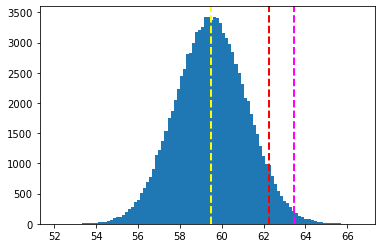

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

np.random.seed(123)
midTerm = np.random.normal(59.45, 1.5, 100)
endTerm = np.random.normal(60.05, 1.5, 100)

# Paired (related) test
t,p = stats.ttest_rel(endTerm, midTerm)
# ttest_rel is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(midTerm.mean(), midTerm.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, midTerm.mean(), midTerm.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

### 3.5 Analysis of Variance Test
There are sometimes situations where we may have multiple independent data samples. We can perform the Student’s t-test pairwise on each combination of the data samples to get an idea of which samples have different means. This can be onerous if we are only interested in whether all samples have the same distribution or not. To answer this question, we can use the analysis of variance test, or ANOVA for short. ANOVA is a statistical test that assumes that the mean across 2 or more groups are equal. If the evidence suggests that this is not the case, the null hypothesis is rejected and at least one data sample has a different distribution.
- Fail to Reject H0: All sample distributions are equal.
- Reject H0: One or more sample distributions are not equal.

The test requires that the data samples are a Gaussian distribution, that the samples are independent, and that all data samples have the same standard deviation.

In [51]:
# analysis of variance test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import f_oneway
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
# compare samples
stat, p = f_oneway(data1, data2, data3) 
print('Statistics={:.3f}, p={:.3f}'.format(stat, p)) 
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)') 
else:
    print('Different distributions (reject H0)')

Statistics=3.655, p=0.027
Different distributions (reject H0)


## 4. Covariance and Correlation
There may be complex and unknown relationships between the variables in your dataset. It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other. This knowledge can help you better prepare your data to meet the expectations of machine learning algorithms, such as linear regression, whose performance will degrade with the presence of these interdependencies.

### 4.1 What is Correlation?
Variables within a dataset can be related for lots of reasons. For example: 
- One variable could cause or depend on the values of another variable.
- One variable could be lightly associated with another variable.
- Two variables could depend on a third unknown variable.

The statistical relationship between two variables is referred to as their correlation. A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.
- Positive Correlation: Both variables change in the same direction. 
- Neutral Correlation: No relationship in the change of the variables. 
- Negative Correlation: Variables change in opposite directions.

The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity. An example is linear regression, where one of the offending correlated variables should be removed in order to improve the skill of the model.

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


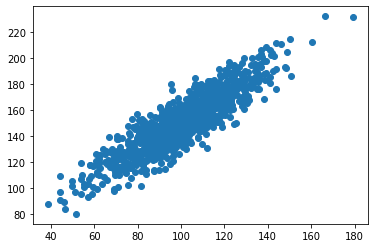

In [44]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# summarize
print('data1: mean={:.3f} stdv={:.3f}'.format(mean(data1), std(data1)))
print('data2: mean={:.3f} stdv={:.3f}'.format(mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()


A scatter plot of the two variables is created. Because we contrived the dataset, we know there is a relationship between the two variables. This is clear when we review the generated scatter plot where we can see an increasing trend.

### 4.2 Covariance
Variables can be related by a linear relationship. This is a relationship that is consistently additive across the two data samples. This relationship can be summarized between two variables, called the covariance. It is calculated as the average of the product between the values from each sample, where the values haven been centered (had their mean subtracted):

$$cov(x,y)=\frac{1}{n}\times \sum_{i=1}^{n}(x_i-mean(x))\times (y_i-mean(y))$$

In [45]:
# calculate the covariance between two variables
from numpy.random import randn
from numpy.random import seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


A problem with covariance as a statistical tool alone is that it is challenging to interpret. This leads us to the Pearson’s correlation coefficient next.

### 4.3 Pearson's Correlation
The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.
$$PearsonCorelation=\frac{cov(x,y)}{std(x)\times std(y)}$$

The Pearson’s correlation is a statistical hypothesis test that does assume that there is no relationship between the samples (null hypothesis). The p-value can be interpreted as follows:
- p-value ≤ alpha: significant result, reject null hypothesis, some relationship (H1).
- p-value > alpha: not significant result, fail to reject null hypothesis, no relationship (H0).

In [47]:
# calculate the pearson's correlation between two variables from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, p = pearsonr(data1, data2)
# display the correlation
print('Pearsons correlation: %.3f' % corr) # interpret the significance
alpha = 0.05
if p > alpha:
    print('No correlation (fail to reject H0)') 
else:
    print('Some correlation (reject H0)')

Pearsons correlation: 0.888
Some correlation (reject H0)
